In [19]:
import struct
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np


(60000, 784)
(60000,)
(10000, 784)
(10000,)
final shape:
(60000, 1, 784) (10000, 1, 784)


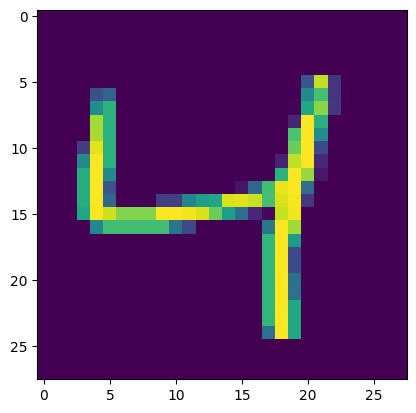

In [20]:
with open('trainimagemnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_image = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_image = train_image.reshape((size,-1))
    plt.imshow(train_image[2].reshape((28,28)))
    print(train_image.shape)
    
with open('trainlabelmnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_label=np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(train_label.shape)    
with open('testimagemnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_image = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_image = test_image.reshape((size,-1))
    print(test_image.shape)    
with open('testlabelmnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_label=np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(test_label.shape)

train_image=train_image.reshape(train_image.shape[0],1,28*28)
test_image=test_image.reshape(test_image.shape[0],1,28*28)
print("final shape:")
print(train_image.shape,test_image.shape)

In [21]:
class layer:
    def __init__(self):
        self.input=None
        self.output=None
    def forward():
        raise NotImplementedError
    def backward_add():
        raise NotImplementedError
    def backward():
        raise NotImplementedError
    
        

In [22]:
class Fully_connected(layer):
    def __init__(self,input_size,output_size):
        self.weights=(np.random.normal(0,0.1,size=(input_size,output_size)))
        self.store_grad=np.zeros((input_size,output_size))
        
        
    def forward(self,Input):
        self.input=Input
        self.output=np.matmul(Input,self.weights)
        #print(self.input.shape,self.output.shape)
        return self.output
    
    def backward_add(self,output_error):
        input_error=np.matmul(output_error, self.weights.T)
        #print(output_error.shape,input_error.shape)
        curr_item_grad=np.matmul(self.input.T,output_error)
        print(output_error,output_error.shape)
        print(curr_item_grad,curr_item_grad.shape)
        
        #print(curr_item_grad,curr_item_grad.shape)
        self.store_grad+=curr_item_grad
        return input_error
        
    def backward(self,eta,batch_size):
        #print(self.weights.shape,self.store_grad.shape)
        #print(self.store_grad,self.store_grad.shape)
        self.weights-=eta*(self.store_grad/batch_size)
        self.store_grad=np.zeros(self.weights.shape)
        return 
        

In [23]:
class Relu(layer):
    
    def forward(self,Input):
        self.input=Input
        self.output=Input*(Input>0)
        #print(self.input.shape,self.output.shape)
        return self.output
    
    def backward_add(self,output_error):
        input_error=output_error*(self.input>0)
        print(output_error,output_error.shape)
        print(input_error,input_error.shape)
        return input_error
    
    def backward(self,eta,batch_size):
        return
        

In [24]:
def loss_softmax_crossentropy(y_pred,y_true):
    ## converting [[1 2 3 ]] to [1 2 3 ]
    #print(y_pred.shape,y_true.shape)
    y_pred=y_pred.reshape(y_pred.shape[1])
    #print(y_pred.shape,y_true.shape)
    
    return -1*y_pred[y_true] + math.log(sum(np.exp(y_pred)))

def loss_softmax_crossentropy_prime(y_pred,y_true):
    
    #print(y_pred.shape,y_true.shape)
    one_hot=np.zeros(y_pred.shape)
    one_hot[0][y_true]=1
    return np.exp(y_pred)/sum(np.exp(y_pred)) - one_hot
    
    

In [25]:
def get_minibatch(training_x, training_y,batch_size=64):
    indexes=np.arange(train_image.shape[0])
    np.random.shuffle(indexes)
    for i in range(0,len(indexes),batch_size):
        mini_x=train_image[indexes[i:i+batch_size]]
        mini_y=train_label[indexes[i:i+batch_size]]
        yield mini_x,mini_y

In [26]:
class MLP():
    
    def __init__(self):
        self.epochs=1
        self.eta=0.1
        self.batch_size=60
        self.layers=[]
        self.lossfunc=None
        self.lossfuncprime=None
    
    def add_layer(self,layer):
        self.layers.append(layer)
        
    def use(self,lossfunc,lossfuncprime):
        self.lossfunc=lossfunc
        self.lossfuncprime=lossfuncprime
    
    def train(self,train_x,train_y):
        
        samples=len(train_x)
        batch_loss=[]
        minloss=10000
        for epoch in range(self.epochs):
            minibatch=get_minibatch(train_x, train_y,self.batch_size)
            for batch_id,(min_x,min_y) in enumerate(minibatch):
                
                loss=0
                for i in range(self.batch_size):
                    
                    
                    ##forward
                    output=min_x[i]
                    for layer in self.layers:
                        output=layer.forward(output)
                        
                    loss+=self.lossfunc(output,min_y[i])
                    #print(f"loss: {loss}")
                    #print("")
                    
                    ##backward_add 
                    output_error=self.lossfuncprime(output,min_y[i])
                    for layer in reversed(self.layers):
                        output_error=layer.backward_add(output_error)
                    #print("")
                    
                batch_loss.append(loss/self.batch_size)
                minloss=min(minloss,loss/self.batch_size)
                
                #updating weights
                for layer in reversed(self.layers):
                    layer.backward(self.eta,self.batch_size)
                 
                print(f"epoch:{epoch} batch:{batch_id} loss:{loss/self.batch_size}")
        plt.plot(batch_loss)
        print(f"minloss={minloss}")
                        
                    
                  
    
    def predict(self,test_x):
        samples=len(test_x)
        y_pred=[]
        for i in range(samples):
            
            output=test_x[i]
            for layer in self.layers:
                output=layer.forward(output)
            
            y_pred.append(np.argmax(output))
        return y_pred
            
        
        
        

In [27]:
model=MLP()

model.add_layer(Fully_connected(784,512))
model.add_layer(Relu())
model.add_layer(Fully_connected(512,256))
model.add_layer(Relu())
model.add_layer(Fully_connected(256,10))

model.use(loss_softmax_crossentropy,loss_softmax_crossentropy_prime)

train_image = train_image.astype('float32')
train_image /= 255
model.train(train_image,train_label)


[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]] (1, 10)
[[0.05935631 0.         0.05935631 ... 0.05935631 0.05935631 0.05935631]
 [0.03886008 0.         0.03886008 ... 0.03886008 0.03886008 0.03886008]
 [1.04373807 0.         1.04373807 ... 1.04373807 1.04373807 1.04373807]
 ...
 [1.78311384 0.         1.78311384 ... 1.78311384 1.78311384 1.78311384]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] (256, 10)
[[ 4.57749344e-01  2.19062088e-01  3.05226035e-02 -4.37288709e-01
   4.57674084e-01  7.90855739e-02 -5.56792624e-02 -2.39288961e-01
   1.46094599e-01 -2.05744795e-01  3.14151978e-01  5.02103881e-02
  -6.04816429e-02 -4.70021227e-01 -1.93532800e-03  1.40200649e-01
  -1.32380823e-01 -2.94392329e-01 -1.60383314e-01  9.66008170e-02
   5.16265997e-01  2.02314225e-01  1.77917363e-01 -1.95299225e-01
   2.64969481e-01 -3.96513673e-01 -2.29594385e-03 -2.63073550e-02
  -3.97359894e-01 -1.77824414e-01 -9.86681

[[ 0.          0.         -0.         -0.50809755  0.34328289  0.12233647
  -0.         -0.19847972  0.         -0.36576098  0.          0.31349494
  -0.         -0.         -0.         -0.14929066 -0.         -0.47504852
  -0.          0.24804347  0.          0.          0.         -0.09810487
   0.         -0.          0.06071731  0.07236451 -0.47321676 -0.
   0.1101584  -0.          0.69195803  0.          0.19713438 -0.00251918
  -0.23958557 -0.          0.         -0.25525696  0.02733699  0.13602884
   0.52276989 -0.         -0.          0.07660594  0.         -0.15021701
   0.22297806 -0.          0.33547579 -0.          0.          0.16781464
   0.          0.          0.         -0.19743906 -0.          0.
   0.          0.          0.         -0.1047218  -0.         -0.17322491
   0.10986011  0.09024349  0.         -0.          0.29396859  0.12059935
  -0.          0.05653557 -0.         -0.24751476  0.60613427  0.17613479
  -0.10928923  0.1612148  -0.37071174 -0.          0. 

[[1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]] (1, 10)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.33698518 0.33698518 0.33698518 ... 0.         0.33698518 0.33698518]
 ...
 [1.74899893 1.74899893 1.74899893 ... 0.         1.74899893 1.74899893]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] (256, 10)
[[ 0.29532586  0.17251139 -0.07805552 -0.61619548  0.55119752 -0.08681306
  -0.28626434 -0.22971242  0.11461826 -0.20982324  0.14575662  0.10375355
  -0.17692415 -0.71210519 -0.09880554 -0.10978062 -0.20458762 -0.44108847
  -0.09829473 -0.10306691  0.43270109  0.35933791  0.37044789 -0.12848344
   0.28007247 -0.43337656 -0.02330175 -0.05607428 -0.32454511 -0.21487305
  -0.06819117  0.03228813  0.90619944 -0.01851094  0.18785704  0.01246556
  -0.2079125  -0.08462979  0.16120608 -0.42720862  0.2736337

[[ 0.00000000e+00 -5.86301748e-01 -0.00000000e+00 -1.15729331e-01
   5.17221825e-02 -6.73598969e-02  0.00000000e+00 -1.81394722e-01
  -0.00000000e+00 -7.35813637e-01 -0.00000000e+00  0.00000000e+00
   2.70810483e-01 -0.00000000e+00  3.20146541e-02 -0.00000000e+00
  -5.78095659e-01 -0.00000000e+00 -5.15060079e-01  3.36843038e-01
  -9.00012213e-02  3.26230893e-02  0.00000000e+00  0.00000000e+00
   2.16605291e-01  0.00000000e+00 -0.00000000e+00  2.88090833e-01
  -0.00000000e+00 -3.85856714e-01 -4.73436267e-02 -3.99722731e-01
  -7.20720207e-02  0.00000000e+00 -4.34644353e-01 -0.00000000e+00
   9.89555429e-02  1.45453873e-02  0.00000000e+00 -0.00000000e+00
   2.02381344e-01  3.79517532e-01  1.55232647e-01  1.25407060e-01
  -0.00000000e+00 -3.79801446e-01 -0.00000000e+00 -5.21222394e-02
  -0.00000000e+00  1.09053625e-01  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -2.81810802e-01  0.00000000e+00  0.00000000e+00
   7.00925764e-03  1.86752564e-02  3.01418733e-01 -0.00000000e+00
   1.61617

[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]] (1, 10)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89963461 0.89963461 0.89963461 ... 0.89963461 0.89963461 0.89963461]
 ...
 [3.42731656 3.42731656 3.42731656 ... 3.42731656 3.42731656 3.42731656]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] (256, 10)
[[ 0.37551136  0.10184268  0.210304   -0.79521126  0.53481846  0.08066132
  -0.25183779 -0.41968708 -0.01332343 -0.28313298  0.18853206 -0.04914114
  -0.24532274 -0.60578903 -0.13950153  0.0576254  -0.00484273 -0.27530571
  -0.15237319  0.09149506  0.48749284  0.4113422   0.28734156  0.09969193
   0.29885058 -0.6840246   0.02377073  0.01737824 -0.36518728 -0.41561932
   0.0055313  -0.04680377  0.64261864 -0.06051109  0.19608502  0.09339632
  -0.15439801 -0.10620262  0.19231448 -0.53992867  0.5080313

[[ 0.          0.          0.         -0.53283215  0.          0.
  -0.         -0.21861478  0.         -0.          0.          0.08710472
  -0.         -0.44816085 -0.         -0.02370325 -0.         -0.27925543
  -0.          0.17831534  0.          0.          0.28692688 -0.23869091
   0.29125662 -0.         -0.         -0.1572756  -0.45143882 -0.
   0.          0.          0.65052494 -0.          0.          0.09827423
  -0.          0.          0.15580653 -0.44056484  0.28702719 -0.16641348
   0.23893632 -0.5850451  -0.          0.32683167  0.         -0.
   0.16861044 -0.          0.49589018 -0.08117773  0.17399105  0.07794737
   0.05698138  0.37514492  0.         -0.08828682 -0.          0.
   0.         -0.          0.11306671 -0.23232461 -0.41477998 -0.
   0.10103163  0.02734905  0.         -0.          0.         -0.14384292
  -0.24944338  0.04470782 -0.         -0.3689271   0.37781423  0.14132815
  -0.0782872   0.06821999 -0.11736157 -0.         -0.          0.
   0.       

[[ 0.114715    0.         -0.06111919 -0.59308153  0.3155759   0.
  -0.         -0.4029291   0.07927694 -0.          0.          0.12301365
  -0.         -0.         -0.         -0.01150094 -0.         -0.1664826
  -0.          0.          0.38673891  0.          0.         -0.
   0.36175995 -0.          0.          0.         -0.33833886 -0.
  -0.         -0.2138558   0.          0.09354098  0.16425967  0.18771025
  -0.11874332 -0.          0.         -0.39953029  0.13038604  0.09535096
   0.29524369 -0.37903249 -0.          0.21755508 -0.         -0.07117534
   0.         -0.          0.22610962  0.07448065 -0.          0.18853947
   0.          0.          0.         -0.         -0.          0.
   0.         -0.          0.15925339 -0.2383228  -0.         -0.
   0.13142426 -0.14003214  0.          0.          0.09907685  0.08781865
  -0.38770954 -0.07137923 -0.         -0.31360494  0.23877332  0.
  -0.28994827  0.         -0.09580156 -0.          0.          0.29845311
   0.        

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.81871013
  -1.293899  ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.33261654
  -0.52567105]
 [ 0.          0.          0.         ...  0.         -0.52700592
  -0.83288627]] (512, 256)
[[ 8.18891057e-01 -2.20590274e+00  2.47306299e-01  4.82909218e-01
  -7.10721159e-01  3.47006123e-01 -4.28105477e+00 -1.97297757e+00
   4.13190352e-01 -2.06623428e+00 -1.59927631e+00 -1.57312034e-01
   1.27493484e+00 -3.41006766e-01 -3.37632763e+00 -1.79749009e+00
  -2.70221080e+00  5.25289206e-01 -1.33824039e+00 -2.16865617e+00
  -1.72305390e+00 -2.63533308e-01 -7.40315481e-01 -1.22245890e+00
  -2.76066718e+00  7.28988749e-01 -7.23210275e-01 -1.10935127e+00
  -3.72602429e-01  1.50417465e-01 -2.39734718e+00 -1.571272

[[ 0.          0.         -0.08607081 -2.33060238 -0.         -0.38637362
  -0.         -0.84121799  0.         -0.53046661  0.         -0.
  -0.         -1.1043824  -0.         -2.05690807 -0.60135567 -0.77457925
  -0.09725889 -0.          0.          0.          0.         -0.18603811
  -0.         -0.59184773 -0.         -0.33466921 -1.5513737  -0.22847901
   0.         -0.2943223   0.         -0.05296712 -0.         -0.
  -0.79617671 -0.         -0.         -1.04014369 -0.         -0.96082902
  -0.         -1.42584112  0.         -0.         -0.         -0.
  -0.         -0.44065608 -0.         -0.82315616 -0.54779814 -0.63685804
   0.          0.         -0.         -0.67287049 -0.          0.
   0.         -0.         -0.         -1.89453743 -0.48510289 -0.
  -1.38650035 -1.20882482 -0.          0.          0.         -0.
  -0.68422162 -0.         -0.         -1.58341227 -0.         -0.
  -0.76500913 -0.         -1.86772047 -0.50313743 -0.          0.
  -0.         -0.         -1

[[ 0.00000000e+00 -2.55545678e+00  0.00000000e+00  1.09839259e-01
  -0.00000000e+00  0.00000000e+00 -4.10202822e+00 -2.07291068e+00
   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -8.07110630e-01 -3.20679620e+00 -2.10565396e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.85643567e+00
  -1.76514516e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -2.71722105e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -2.11407608e-01 -2.25330236e-01 -1.96538187e+00 -1.87178654e+00
  -0.00000000e+00  0.00000000e+00 -3.37069013e+00  0.00000000e+00
  -0.00000000e+00 -3.59891490e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -1.49923812e+00 -0.00000000e+00 -2.01747922e+00
  -1.44367079e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.34233862e-01 -9.23116388e-01 -0.00000000e+00
  -1.36981062e+00  0.00000000e+00 -1.27691596e+00 -0.00000000e+00
   4.84459

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
test_image = test_image.astype('float32')
test_image /= 255
y_pred=model.predict(test_image)


In [ ]:

n=len(test_image)
s=0
print(n)
for i in range(n):
    s+=(y_pred[i]==test_label[i])
print(s)
print(f"test accuracy: {s/n}")
        